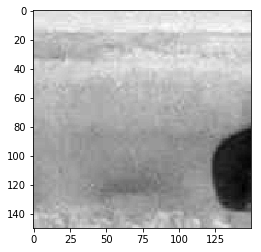

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/shannen/Datasets/CNRPark_A"
CATEGORIES = ["free", "busy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to busy and free dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array.shape)

(150, 150)


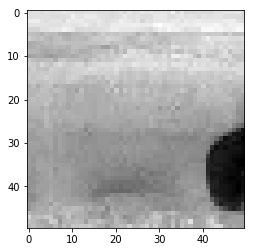

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to free and busy dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [6]:
print(len(training_data))

6171


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
0
0
1
1
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [13]:
X[1]

array([[[141],
        [144],
        [147],
        ...,
        [150],
        [152],
        [150]],

       [[138],
        [135],
        [138],
        ...,
        [146],
        [148],
        [145]],

       [[138],
        [137],
        [146],
        ...,
        [143],
        [144],
        [146]],

       ...,

       [[121],
        [122],
        [119],
        ...,
        [121],
        [124],
        [121]],

       [[120],
        [121],
        [121],
        ...,
        [116],
        [122],
        [117]],

       [[119],
        [123],
        [121],
        ...,
        [114],
        [115],
        [119]]], dtype=uint8)